In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

from uniform_attachment_model  import matrix_uniform_attachment


0.05231428146362305


In [28]:
def find_barycenter_deterministic(adj_matrix):
    leaf_cut = []    
    adj_matrix_copy = copy.deepcopy(adj_matrix)
    
    n = len(adj_matrix_copy)  # Number of nodes, number of rows
    degrees = np.sum(adj_matrix_copy, axis=1)  # Sum of row = degree
    nodes = set(range(n))  # All vertices
    
    while len(nodes) > 2: 
        # Find all leaf nodes (nodes with degree 1)
        leaf_nodes = [i for i in nodes if degrees[i] == 1]  # Only those with a single 1 are leaves
        
        for leaf in leaf_nodes:
            nodes.remove(leaf)  # Remove the leaf
            degrees[leaf] = 0  # Degree is then 0

            for neighbor in range(n):  # Check all neighbors
                if adj_matrix_copy[leaf][neighbor] == 1:  # If there is a connection
                    degrees[neighbor] -= 1  # Decrement the degree of the neighbor
                    adj_matrix_copy[leaf][neighbor] = 0  # Change the 1 to 0
                    adj_matrix_copy[neighbor][leaf] = 0  # Also change its "transpose position" to 0
        leaf_cut.append(1)

    # At this point, there should only be 1 or 2 nodes left
    remaining_nodes = list(nodes)  # Convert the set to a list

    if len(remaining_nodes) == 1:  # If only 1 vertex remains
        return remaining_nodes, adj_matrix_copy, sum(leaf_cut)
    elif len(remaining_nodes) == 2:  # If 2 vertices remain
        return remaining_nodes, adj_matrix_copy, sum(leaf_cut)


In [29]:
def draw_graph_from_adjacency_matrix(adjacency_matrix):
    G = nx.Graph()

    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0: 
                G.add_edge(i, j, weight=adjacency_matrix[i][j])


    G.add_nodes_from(range(len(adjacency_matrix)))

    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightblue',
        edge_color='black',
        node_size=10,
        font_size=10,
        width=0.5
    )
    plt.title("Graph from Adjacency Matrix")
    plt.show()

In [70]:
matrix = matrix_uniform_attachment(n=30)

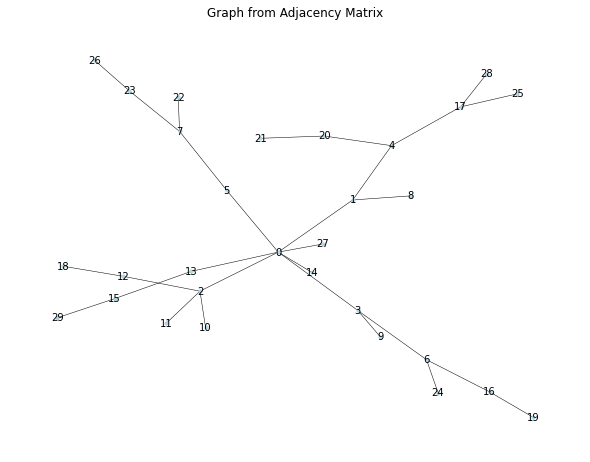

In [71]:
draw_graph_from_adjacency_matrix(matrix)

In [72]:
barycenter, adj_matrix, cuts= find_barycenter_deterministic(matrix)

In [73]:
cuts

4

In [74]:
barycenter

[0]

In [75]:
cuts_list = []
for i in range(100):
    matrix = matrix_uniform_attachment(n=30)
    barycenter, adj_matrix, cuts= find_barycenter_deterministic(matrix)
    cuts_list.append(cuts)

In [77]:
np.mean(cuts_list)

np.float64(4.44)

In [78]:
np.log(1 - (1/1000))

np.float64(-0.0010005003335835344)